<!-- ENG -->
# Exercises in Fundamentals of Data Science ⑤

※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- ENG -->
　The practice exercises this time are the following.

- **DS5.0 | Preparing a data set**
- **DS5.1 | Hierarchical clustering**
- **DS5.2 | <var>K</var>-means clustering**

　There are many algorithms for clustering, but this time we will deal with hierarchical clustering and <var>K</var>-means clustering, which are relatively easy to understand.


---

<!-- ENG -->
## DS5.0 | Preparing a data set

<!-- ENG -->
　This time, we will use two data sets that have different properties. One is the Gaussian data set, where each cluster is generated from a normal distribution with different centers and variances. The other is the moon data set, where each cluster has a crescent moon shape, and the shape is a combination of those.

<!-- ENG -->
　The bottom cell is the function that generates the Gaussian data set. The function takes the following arguments: a list of normal distribution centers for `centers`, a list of standard deviations for `stds`, and a list of number of data sets for `sizes`.

In [1]:
# dataset generation
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

def gen_2d_gaussian(centers, stds, sizes, random_state=0):
  # generate data based on 2D-gaussian
  np.random.seed(random_state)

  clusters = []
  labels = []
  # for each cluster
  for i in range(len(sizes)):
    clusters.append(normal(centers[i], stds[i], size=(sizes[i], 2)))
    labels.extend([i]*sizes[i])
  ret = np.concatenate(clusters, axis=0) 
  return ret, np.array(labels)
  
# default parameter: gen_2d_gaussian([(0, 0), (5, 0)], [0.75, 1.25], [100, 300])
data_gaussian, labels_gaussian = gen_2d_gaussian([(0, 0), (5, 0)], [0.75, 1.25], [100, 300])

<!-- ENG -->
　The moon data set is generated using a function provided in scikit-learn.

In [2]:
from sklearn.datasets import make_moons
data_moon, labels_moon = make_moons(n_samples=300, noise=0.05, random_state=0)

<!-- ENG -->
　Let's take a look at the data set that was created. `plot_clustering` is a function to plot the result of clustering. The `cluster_labels` is the information about which cluster each data belongs to, and the color of the data is determined based on this information.

　Here, we use the cluster number (true label) when the data set was generated.

In [3]:
# function for plot cluster by color
def plot_clustering(data, cluster_labels, n_clusters=2, title=None, multi_color=True):

  plt.figure(figsize=(6, 6))
  cmap = plt.get_cmap('gist_rainbow')
  for i in range(n_clusters):
    if multi_color:
      color_float = i/n_clusters
    else:
      color_float = 0
    plt.scatter(data[cluster_labels==i, 0], data[cluster_labels==i, 1],
                color=cmap(color_float))
    

  plt.axis('equal') # make figure square (1:1 aspect ratio)
  if title is not None:
    plt.title(title)
  plt.show()

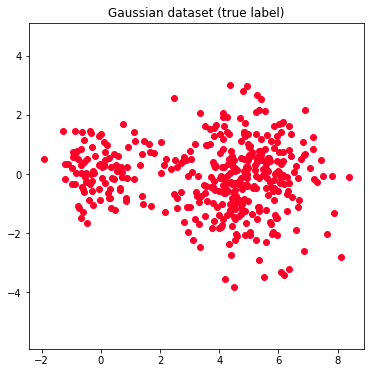

In [4]:
plot_clustering(data_gaussian, labels_gaussian, title="Gaussian dataset (true label)", multi_color=False)

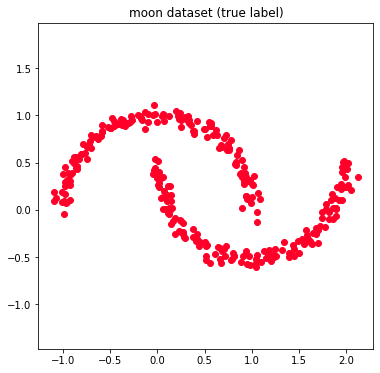

In [5]:
plot_clustering(data_moon, labels_moon, title="moon dataset (true label)", multi_color=False)

<!-- ENG -->
　Note that in this case, we know in advance which cluster the data belongs to, but in the actual data set, it is unknown (unsupervised) which cluster the data belongs to.

---

<!-- ENG -->
## DS5.1 | Hierarchical clustering

<!-- ENG -->
　Clustering is a method of dividing data into multiple groups (clusters) using only its features. Data belonging to the same cluster should be similar to each other, and data belonging to different clusters should not be similar to each other.



　There are two types of hierarchical clustering methods: **top-down (divisive hierarchical clustering)** and **bottom-up (agglomerative hierarchical clustering)**.

In the top-down method, the initial state is that the cluster contains all data as in a decision tree, and clustering is performed by repeatedly dividing the cluster into two clusters by the split that best divides the data.

In the bottom-up method, the initial state is that all data belong to different clusters from each other, and clustering is performed by repeating the process of combining the pairs with the closest distance between clusters into one.

<!-- ENG -->
　Of these, the bottom-up method is superior in terms of computational cost for simple implementations. The intuitive reason is that when the number of data is $N$, there are approximately $2^N$ ways to divide the first cluster using the top-down method, while there are approximately $N^2$ ways to group the first cluster using the bottom-up method. Here, we will try to run the actual code using the bottom-up method.

<!-- ENG -->
　The next cell is the part where the actual clustering is performed. A method to determine the similarity between clusters is defined in `linkage`. The choices for `linkage`are:

　`"ward", "complete", "average", "single"`

  Refer to the lecture materials for details of these methods. By default, scikit-learn uses the commonly used Ward's method (`"ward"`) (Refer to the Fundamentals of Data Science lecture material to find out what value Ward's method uses to merge two clusters into one).

Number of cluster members: (282, 118)


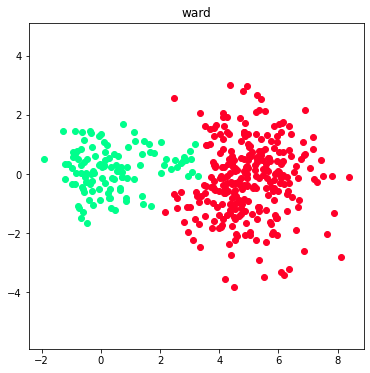

In [6]:
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

n_clusters = 2
method = "ward" # CHANGE HERE

# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_gaussian)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_gaussian, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")


<!-- ENG -->
　In the case of hierarchical clustering, a **dendrogram** can be used **to check how the clusters were formed using the bottom-up method**.

　If you want to draw a dendrogram, it is better to use another library called SciPy rather than `sklearn.cluster.AgglomerativeClustering()`, so use this one. (**Supplementary Material S1**)

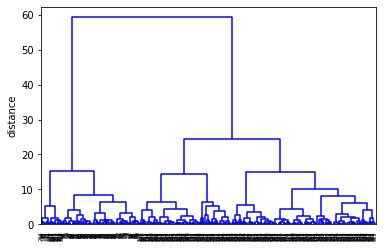

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

Z = hierarchy.linkage(data_gaussian, method=method)
hierarchy.dendrogram(Z, color_threshold=0)
plt.ylabel("distance")
plt.show()

<!-- ENG -->
　With hierarchical clustering, "dividing into two clusters" is **equivalent to scissoring a dendrogram horizontally** (i.e., by determining a particular distance threshold) **so that it becomes two (smaller) dendrograms**.

---

<!-- ENG -->
##### Exercise DS5.1
For the Gaussian and moon data sets, vary `linkage`, the method for determining the similarity between clusters, execute, and select one method that successfully clusters the data and one method that does not.

---

Number of cluster members: (273, 127)


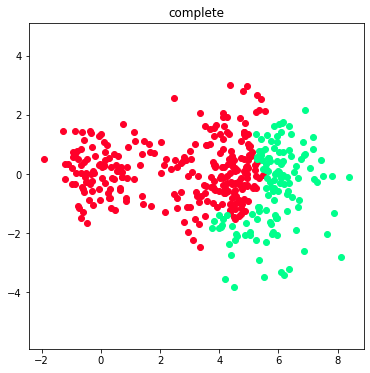

In [8]:
n_clusters = 2
method = "complete"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_gaussian)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_gaussian, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")


Number of cluster members: (285, 115)


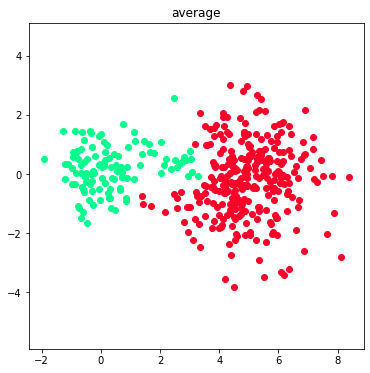

In [9]:
n_clusters = 2
method = "average"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_gaussian)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_gaussian, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

Number of cluster members: (399, 1)


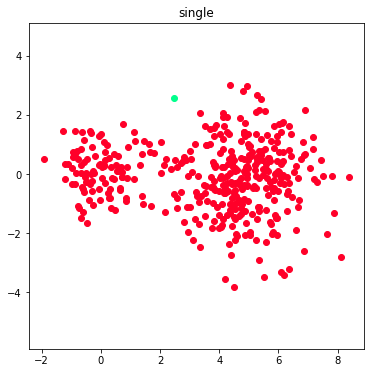

In [10]:
n_clusters = 2
method = "single"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_gaussian)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_gaussian, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

gaussian 5:3 is ideal

the ward 282/118 is more close to (250/150 = 5/3) rather than average: 285/115

moon data

Number of cluster members: (178, 122)


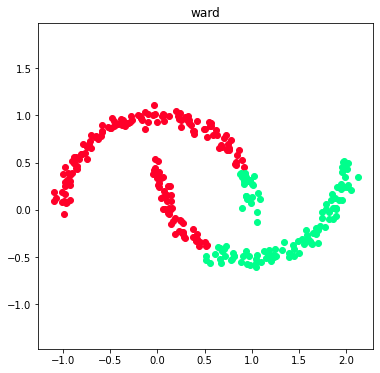

In [11]:
method = "ward"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_moon)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_moon, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

Number of cluster members: (218, 82)


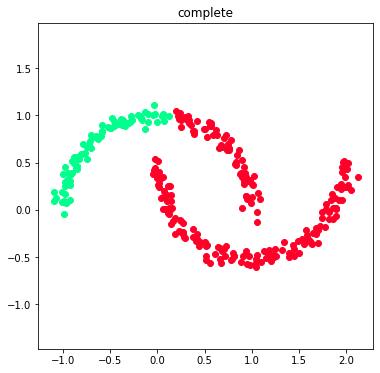

In [12]:
method = "complete"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_moon)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_moon, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

Number of cluster members: (202, 98)


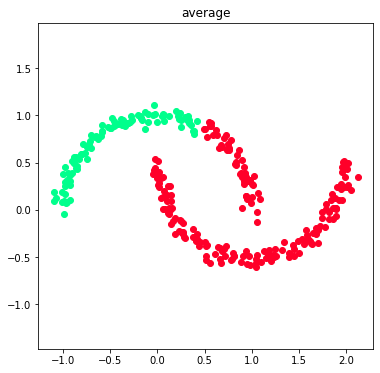

In [13]:
method = "average"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_moon)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_moon, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

Number of cluster members: (150, 150)


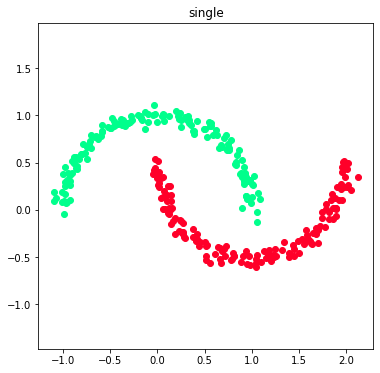

In [14]:
method = "single"
# do clustering
clustering = AgglomerativeClustering(linkage=method, n_clusters=n_clusters)
clustering.fit(data_moon)

# print number of cluster members
member_0 = np.count_nonzero(clustering.labels_==0)
member_1 = np.count_nonzero(clustering.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_moon, clustering.labels_, 
                n_clusters=n_clusters, title=f"{method}")

<!-- ENG -->
##### Exercise DS5.2

Discuss the reasons why the one is successful and the other is not, as observed in Exercise DS5.1.


https://medium.com/ai-academy-taiwan/clustering-method-4-ed927a5b4377

---

<!-- ENG -->
## DS5.2 | <var>K</var>-means clustering

<!-- ENG -->
　**<var>K</var>-means clustering** is a method that uses the following algorithm to determine clusters.

1. Randomly choose **$k$** points as the cluster centers.
2. Make each data item belong to the cluster whose center is closest to it.
3. Update the center of the cluster with the **mean** of the data belonging to that cluster.
4. Repeat steps 2 to 3 until convergence.

　<var>K</var>-means clustering has the following properties:
 * Randomly choose the initial state, and the result changes depending on the initial value
 * In the end, each data belongs to the cluster closest to the cluster center.
 
The boundaries between clusters are straight lines or (hyper)planes.
 
　Let's actually try <var>K</var>-means clustering in practice.

Number of cluster members: (289, 111)


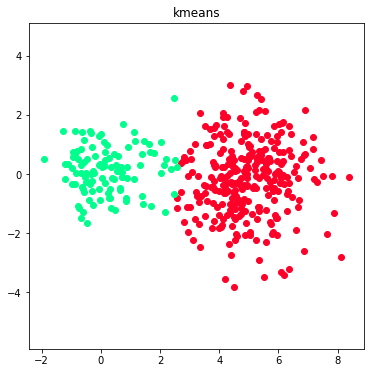

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0, n_clusters=2)
kmeans.fit(data_gaussian)

# print number of cluster members
member_0 = np.count_nonzero(kmeans.labels_==0)
member_1 = np.count_nonzero(kmeans.labels_==1)
print(f"Number of cluster members: ({member_0}, {member_1})")

plot_clustering(data_gaussian, kmeans.labels_, n_clusters=2, title="kmeans")
plt.show()

<!-- ENG -->
　Next, let's run <var>K</var>-means clustering one step at a time without using the `KMeans` library and see how the clustering is actually performed. Here, ★ represents the center of each, and the straight line represents the cluster boundary.

In [16]:
def means_of_clusters(data, labels, n_clusters=2):
  # return means of clusters
  ret = []
  for i in range(n_clusters):
    ret.append(np.mean(data[labels==i], axis=0))
  return np.array(ret)

In [17]:
def belong_cluster(data, means):
  # return nearest cluster label for each data point
  labels = []

  # iterate by row (each data)
  for data_point in data:
    dists = []
    # iterate by row (each cluster)
    for cluster_center in means:
      dist = np.linalg.norm(data_point-cluster_center)
      dists.append(dist)

    nearest_cluster = np.argmin(dists)
    labels.append(nearest_cluster)
  return np.array(labels)

In [18]:
def plot_kmeans(data, means, cluster_labels, ax, title=None):
  # plot K-means clustering 
  # only for 2 classes, because of cluster boundary implementation
  colors = ["blue", "red"]
  n_clusters = 2
  for i in range(n_clusters):
    # plot each cluster's data points
    ax.scatter(data[cluster_labels==i, 0], data[cluster_labels==i, 1],
                color=colors[i], s=16, alpha=0.7)
    # plot each cluster's mean
    ax.scatter([means[i, 0]], [means[i, 1]], marker="*",
                color="k", s=92)

  # plot cluster boundary (vertical bisector of cluster means)
  center = np.mean(means, axis=0)
  diff = means[1]-means[0]
  ortho_grad = np.array([-diff[1], diff[0]]) / np.linalg.norm(diff) 
  ax.plot([center[0]-ortho_grad[0]*4, center[0]+ortho_grad[0]*4],
          [center[1]-ortho_grad[1]*4, center[1]+ortho_grad[1]*4])
  
  # set graph appearance
  plt.tight_layout()
  ax.set_xlim([-3, 9])
  ax.set_ylim([-6, 6])
  ax.axis('equal')
  if title is not None:
    plt.title(title)


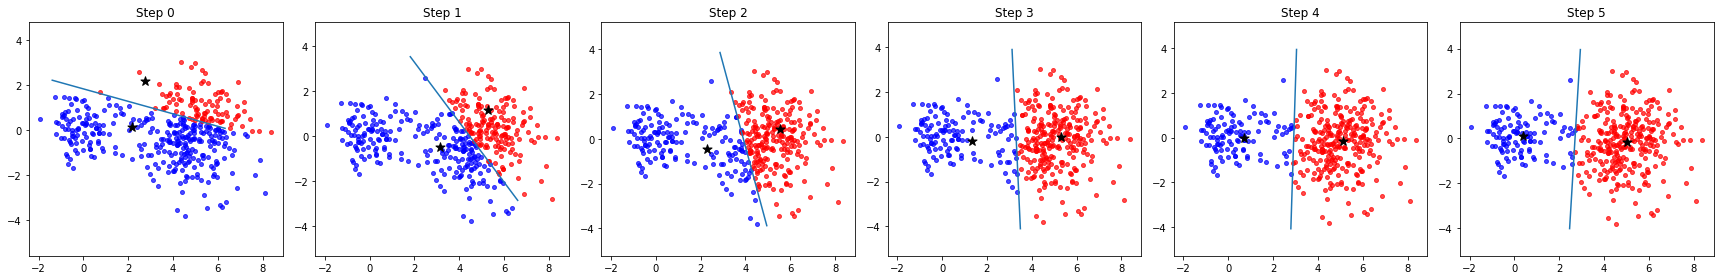

In [19]:
# clustering parameter
n_clusters = 2
initial_range = 5
n_iter = 6

fig = plt.figure(figsize=(4*n_iter, 4))

kmeans_random_seed = 2 # kmeans random seed

# randomly choose initial cluster means
np.random.seed(kmeans_random_seed)
means = np.random.rand(n_clusters, 2)*initial_range

for i in range(n_iter):
  # belong datapoints to new cluster
  kmeans_labels = belong_cluster(data_gaussian, means)

  # Add i-th figure (1-origin)
  ax = fig.add_subplot(1, n_iter, i+1)
  # Pass the figure to plot function
  plot_kmeans(data_gaussian, means, kmeans_labels, ax,
              title=f"Step {i}")

  # calculate new means
  means = means_of_clusters(data_gaussian, kmeans_labels, n_clusters)

---

<!-- ENG -->
##### Exercise DS5.3
　As mentioned earlier, the results of <var>K</var>-means clustering changes depending on the randomly chosen initial state.

　Execute your <var>K</var>-means clustering by changing the initial value (`kmeans_random_seed`) and discuss the results with a diagram.
For example, what areas are more likely to be affected by random elements, and what areas are less likely to be? Attach at least one figure to your answer.

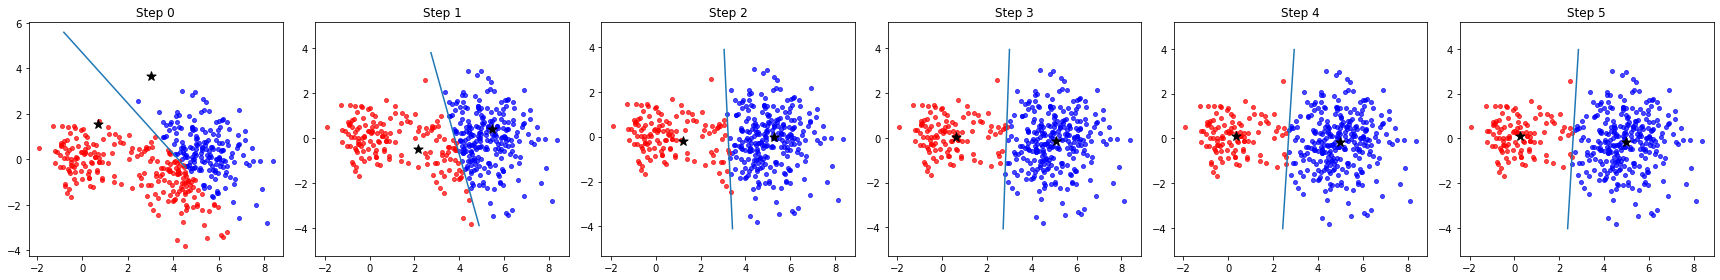

In [29]:
# clustering parameter
n_clusters = 2
initial_range = 5
n_iter = 6

fig = plt.figure(figsize=(4*n_iter, 4))

kmeans_random_seed = 2021 # kmeans random seed

# randomly choose initial cluster means
np.random.seed(kmeans_random_seed)
means = np.random.rand(n_clusters, 2)*initial_range

for i in range(n_iter):
  # belong datapoints to new cluster
  kmeans_labels = belong_cluster(data_gaussian, means)

  # Add i-th figure (1-origin)
  ax = fig.add_subplot(1, n_iter, i+1)
  # Pass the figure to plot function
  plot_kmeans(data_gaussian, means, kmeans_labels, ax,
              title=f"Step {i}")

  # calculate new means
  means = means_of_clusters(data_gaussian, kmeans_labels, n_clusters)

---

<!-- ENG -->
##### Exercise DS5.4

　What happens if we cluster the moon data with <var>K</var>-means clustering (the number of clusters is 2)?
 * **Predict the results prior to execution**, then compare and discuss the results with the actual execution results for some initial values, and;  
 * Describe why that happened

　In order to keep the scale of the data the same, the moon data set should be as follows.

```python
kmeans_data_moon = data_moon * 3
```

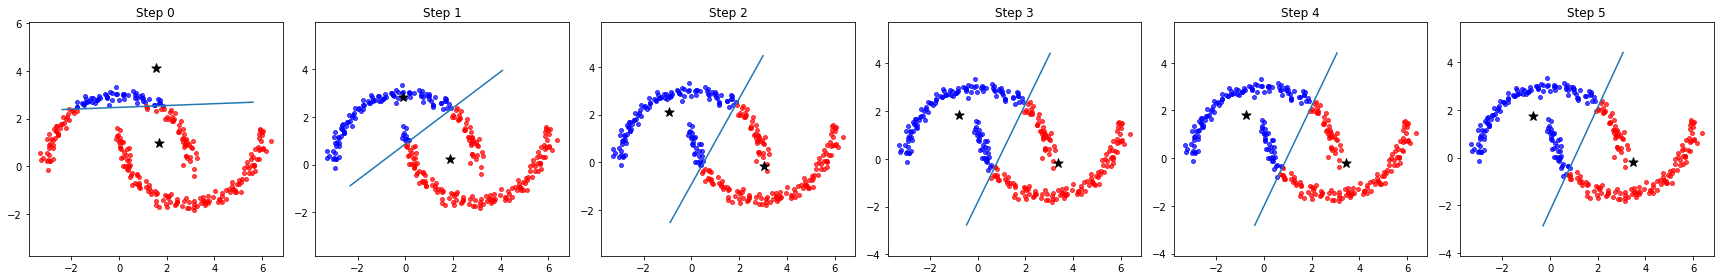

In [37]:
# clustering parameter
n_clusters = 2
initial_range = 5
n_iter = 6
kmeans_data_moon = data_moon * 3
fig = plt.figure(figsize=(4*n_iter, 4))

kmeans_random_seed = 76 # kmeans random seed

# randomly choose initial cluster means
np.random.seed(kmeans_random_seed)
means = np.random.rand(n_clusters, 2)*initial_range

for i in range(n_iter):
  # belong datapoints to new cluster
  kmeans_labels = belong_cluster(kmeans_data_moon, means)

  # Add i-th figure (1-origin)
  ax = fig.add_subplot(1, n_iter, i+1)
  # Pass the figure to plot function
  plot_kmeans(kmeans_data_moon, means, kmeans_labels, ax,
              title=f"Step {i}")

  # calculate new means
  means = means_of_clusters(kmeans_data_moon, kmeans_labels, n_clusters)

---

<!-- ENG -->
##### Exercise DS5.5
　<var>K</var>-means clustering requires the number of clusters to be entered in advance. Not only limited to <var>K</var>-means clustering, but there are many cases in clustering where you have to specify how many clusters to divide into.
**Discuss and describe a method for objectively determining the number of clusters.**

 X-means clustering is a variation of k-means clustering that refines cluster assignments by repeatedly attempting subdivision, and keeping the best resulting splits, until a criterion such as the Akaike information criterion (AIC) or Bayesian information criterion (BIC) is reached

---

<!-- ENG -->
##### Exercise DS5.6 (Advanced)
　Apply the method for objectively determining the number of clusters considered in Exercise DS5.5 to both the Gaussian and moon data sets, and discuss whether it worked and why.

---

<!-- ENG -->
## DS5.3 | Example of a hypothesis formulation using clustering

<!-- ENG -->
　In unsupervised learning such as clustering, the answer (YES/NO or the number you want to predict) often does not exist, and in such cases **it is important to formulate a new hypothesis from the analysis results**.

<!-- ENG -->
　Here, we will perform <var>K</var>-means clustering on the mail order customer data set available on Kaggle (likely artificial data, primary source seems to be Udemy's material) and see what kind of results we get.



https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



　Imagine that you are trying to figure out what kind of audience you should market to based on these results.

<!-- ENG -->
　Now, let's try <var>K</var>-means clustering for "annual income" and "spending score (score calculated from purchase history, etc.)".

In [20]:
# Preparing a data set
import pandas as pd
import requests
import io

# Get data sets from the Internet
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
download = requests.get(url).content
csv_string = io.StringIO(download.decode('utf-8'))
data_df = pd.read_csv(csv_string)
data_df = data_df.drop("CustomerID", axis=1) # Delete Customer ID column
data_df = data_df.drop("Genre", axis=1)      # Remove Genre column (gender) as it is too cumbersome to process

In [21]:
print(data_df.head())
print("------------")
print(data_df.describe())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
------------
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


<!-- ENG -->
　From here, we get the annual income and spending score to perform <var>K</var>-means clustering, and these two types of values have different variances. Since **<var>K</var>-means clustering usually uses the Euclidean distance between data**, features with higher variance are treated as if they are more important.



　To avoid this, you should carry out **standardization before implementing <var>K</var>-means clustering**.

In [22]:
from sklearn.preprocessing import StandardScaler

X = data_df[["Annual Income (k$)", "Spending Score (1-100)"]].values
X_std = StandardScaler().fit_transform(X)

<!-- ENG -->
　Now, let's try implementing <var>K</var>-means clustering.

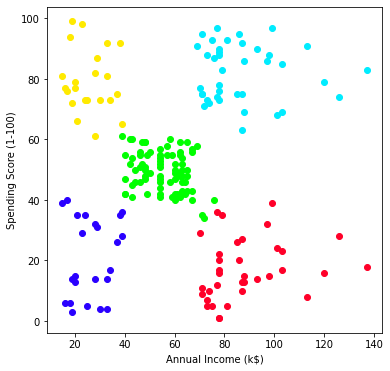

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_random_seed = 0
n_clusters = 5
kmeans = KMeans(random_state=kmeans_random_seed, n_clusters=n_clusters)
kmeans.fit(X_std)


# Figure drawing
plt.figure(figsize=(6, 6))
cmap = plt.get_cmap('gist_rainbow')
for i in range(n_clusters):
    plt.scatter(data_df.loc[kmeans.labels_==i, "Annual Income (k$)"], 
                data_df.loc[kmeans.labels_==i, "Spending Score (1-100)"],
                color=cmap(i/n_clusters))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

<!-- ENG -->
　Well, it seems that it can be divided into five clusters quite clearly. What is the mean value etc. of each element for each group?

In [24]:
for i in range(n_clusters):
  print("cluster", i)
  print(data_df[kmeans.labels_==i].mean())
  print("----------------------------------")

cluster 0
Age                       41.114286
Annual Income (k$)        88.200000
Spending Score (1-100)    17.114286
dtype: float64
----------------------------------
cluster 1
Age                       25.272727
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
dtype: float64
----------------------------------
cluster 2
Age                       42.716049
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
dtype: float64
----------------------------------
cluster 3
Age                       32.692308
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
dtype: float64
----------------------------------
cluster 4
Age                       45.217391
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
dtype: float64
----------------------------------


<!-- ENG -->
　The results show, for example, the following.

- Since the average age of the cluster of "ideal customers" with high spending scores and annual income is young, strategies to keep those customers engaged may be important.

- On the other hand, the average age of the cluster of "potential customers" with low spending scores despite their high annual income is high, so perhaps new customer acquisition should be done for middle-aged and older people.

<!-- ENG -->
　This kind of analysis will allow us to **formulate various hypotheses more easily and faster than a human can discover by sight**.

　However, the number of features or clusters to be used is subjective. When the number of data is small, the intervention of human perception becomes more pronounced. It is important to be aware that **this is only a hypothesis and not an absolute fact**, and to keep an eye on whether this hypothesis holds true when new customers (i.e., data) arrive, and whether the changes occur as expected when new strategies are implemented.

　As we want to emphasize throughout this practice exercise, it is important to remember that **"you have to look at the data like you love doing it"**.

------

<!-- ENG -->

# Report submissions (FY2021)



<!-- ENG -->
## How to submit reports

　The report should be submitted **via T2SCHOLA**. **The deadline is the start of the next Exercise in the Fundamentals of Data Science**. Be sure to submit your work with plenty of time to spare as the form cannot receive after the deadline.


<!-- ENG -->
## Answer Sheet Template

```
Student ID number:
Name:

Exercise DS5.1
Best method:
Worst method:
Discussion：

Exercise DS5.2
Best method:
Worst method:
Discussion：

Exercise DS5.3
(Write your answer for Exercise DS5.3 here. At least one figure should be used. )

Exercise DS5.4
(Write your answer for Exercise DS5.4 here.)

Exercise DS5.5
(Write your answer for Exercise DS5.5 here.)

Exercise DS5.6 (Advanced)
(Write your answer for Exercise DS5.6 here.)

```

<!-- ENG -->
# Supplementary Material

<!-- ENG -->
## S1 | Relationship between `sklearn.cluster.AgglomerativeClustering() ` and ` scipy.cluster.hierarchy()`

　scikit-learn was used for clustering, and SciPy was used for drawing dendrograms. Usually, if you use different libraries, the results should be somewhat different depending on how the library is implemented. However, `sklearn.cluster.AgglomerativeClustering()` uses `scipy.cluster.hierarchy()` internally, and the clustering which is consisted for output creation and keywords for selecting the clustering method (such as `ward` and `complete`) are completely identical.

　For these reasons, the two libraries were used across the board for clustering and drawing dendrograms, but the scikit-learn homepage also shows how to create dendrograms from `AgglomerativeClustering()`. This method was not used in the lecture because it is difficult to understand, but referring to it may lead to a deeper understanding of what kind of data `Z` is and how to create it.

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html